In [37]:
import pymongo as mg
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


# return a mongodb client
def get_client(usr, pwd, address, port='27017'):
    url = 'mongodb://%s:%s@%s:%s/RESTfulSwarmDB' % (usr, pwd, address, port)
    return mg.MongoClient(url)


# return a database object
def get_db(client, db_name):
    return client[db_name]


# return a collection cursor object
def get_col(db, col_name):
    return db[col_name]


# query data in a job collection
def query_col(col):
    return list(col.find({}))[0]


# get a list of job collection name
def get_all_cols(db):
     return db.collection_names()

# delete a collection(a job in my work)
def drop_col(client, db_name, col_name):
    db = client[db_name]
    col = db[col_name]
    col.drop()

def find_col(col):
    return list(col.find({}))

def update_doc(col, filter_key, filter_value, target_key, target_value):
    return col.update_one({filter_key: filter_value}, {"$set": {target_key: target_value}})

In [38]:
client = get_client('admin', 'kzw', '129.114.108.18')
db = get_db(client, 'RESTfulSwarmDB')

In [39]:
def clear_db():
    all_cols = get_all_cols(db)
    if 'WorkersResourceInfo' in all_cols:
        # Drop worker resource info collection
        drop_col(client, 'RESTfulSwarmDB', 'WorkersResourceInfo')

    if 'WorkersInfo' in all_cols:
        # Reset worker info collection
        workers_info_col = get_col(db, 'WorkersInfo')
        workers_info_data = find_col(workers_info_col)
        for index, worker in enumerate(workers_info_data[:]):
            for cpu in worker['CPUs']:
                workers_info_data[index]['CPUs'][cpu] = False
            update_doc(col=workers_info_col,
                          filter_key='hostname',
                          filter_value=worker['hostname'],
                          target_key='CPUs',
                          target_value=workers_info_data[index]['CPUs'])
    print('Reset MongoDB.')
clear_db()

Reset MongoDB.


In [40]:
for col in get_all_cols(db):
    db[col].drop()

[  1.2181673   62.7584002  124.2986331  185.838866   247.37909889
 308.91933179 370.45956469 431.99979758 493.54003048 555.08026338
 616.62049627]
[0.00129996 0.00129996 0.00129996 0.00151662 0.00173328 0.00173328
 0.00173328 0.00194994 0.00173328 0.00194994]
50%% percentile: 345.4197299480438
90%% percentile: 563.685618686676
95%% percentile: 595.2009374618531
100%% percentile: 616.6204962730408


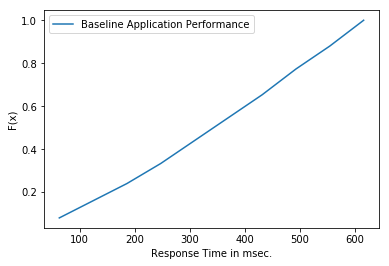

[ 36.0040803   44.85518906  53.70629783  62.55740659  71.40851536
  80.25962412  89.11073289  97.96184165 106.81295042 115.66405919
 124.51516795]
[0.02259604 0.06326891 0.01506403 0.00301281 0.         0.
 0.         0.         0.         0.00903842]
50%% percentile: 47.04033064842224
90%% percentile: 61.63952727317814
95%% percentile: 117.75695967674254
100%% percentile: 124.51516795158386


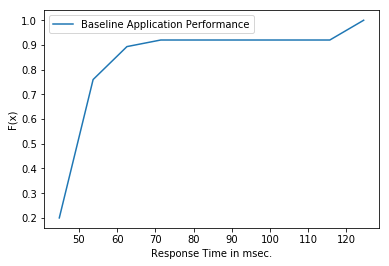

[119.52478123 173.95254648 228.38031173 282.80807698 337.23584223
 391.66360748 446.09137273 500.51913798 554.94690323 609.37466848
 663.80243373]
[0.00220476 0.00171481 0.00171481 0.00146984 0.00195978 0.00171481
 0.00220476 0.00146984 0.00171481 0.00220476]
50%% percentile: 392.32291173934937
90%% percentile: 610.6388396263122
95%% percentile: 638.03160033226
100%% percentile: 663.8024337291718


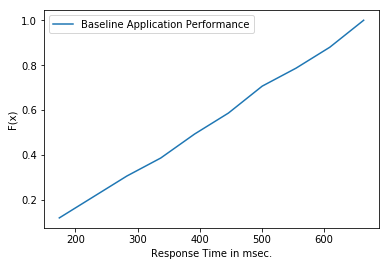